In [1]:
import os
import scanpy as sc
sc.set_figure_params(dpi=100, dpi_save=1000, vector_friendly=True)
import matplotlib
from matplotlib import font_manager
import matplotlib.pyplot as plt
font_dirs = "/data/projects/robin/fonts"
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
matplotlib.pyplot.rcParams['font.family'] = "Arial"

In [2]:
data = sc.read("../xenium_outs/adata_complete_reduced.h5ad")

/opt/conda/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [3]:
data.shape

(3218210, 480)

In [4]:
data = data[data.obs.is_in_polygon]

In [5]:
data.obs["nichepca_domain"].value_counts()

nichepca_domain
Other                 264111
Glom.                 170812
Prox. Tubule          110711
DistaL Con. Tubule     51594
Name: count, dtype: int64

In [6]:
data = data[data.obs.Biopsy_ID.astype(str)!="nan"]

In [7]:
df = data.to_df(layer="counts")
df["polygon_flags"] = data.obs["polygon_flags"].tolist()
df = df.groupby("polygon_flags").agg("mean")

In [8]:
from anndata import AnnData

In [9]:
adata = AnnData(df)

In [10]:
adata.obs["Disease"] = [e.split("_")[-2] for e in adata.obs.index]

In [11]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [12]:
sc.tl.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata)

/opt/conda/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12040. The TBB threading layer is disabled.
  warnings.warn(problem)


/opt/conda/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


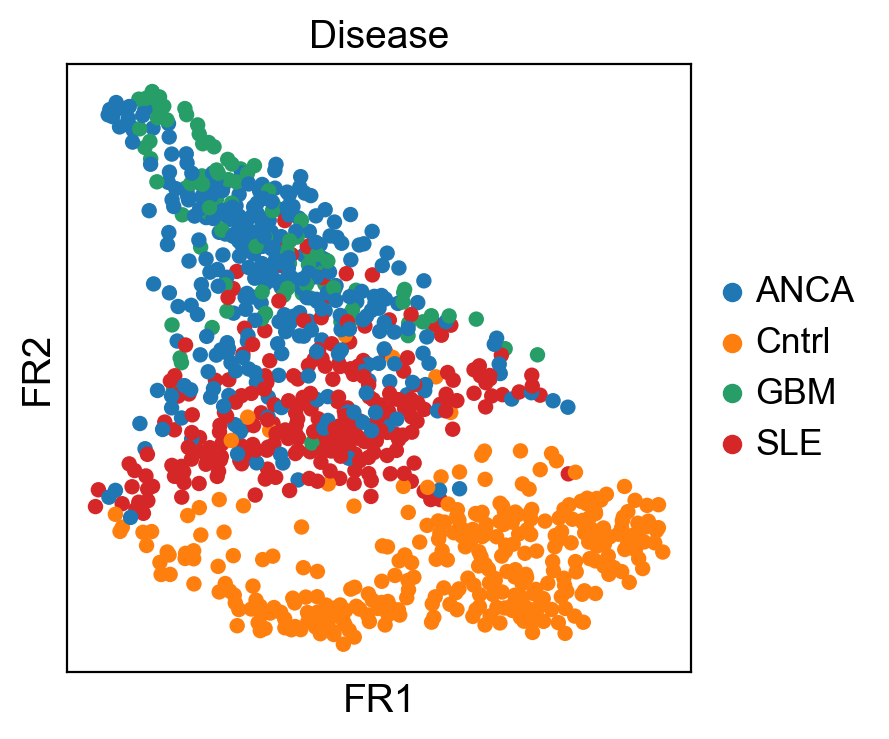

In [13]:
sc.tl.draw_graph(adata)
sc.pl.draw_graph(adata, color="Disease")

In [14]:
# sc.tl.diffmap(adata)
# sc.pp.neighbors(adata, n_neighbors=10, use_rep="X_diffmap")

In [15]:
# sc.tl.draw_graph(adata)
# sc.pl.draw_graph(adata, color="Disease")

In [16]:
import numpy as np

In [17]:
adata.uns["iroot"] = np.flatnonzero(adata.obs["Disease"] == "Cntrl")[0]

In [18]:
sc.tl.dpt(adata)

In [19]:
adata.obs

,Disease,dpt_pseudotime
polygon_flags,,
0_0011216_ANCA_X17,ANCA,0.441351
0_0011216_ANCA_X18,ANCA,0.599756
0_0011216_ANCA_X19,ANCA,0.620689
0_0011216_ANCA_X20,ANCA,0.413301
"0_0011216_ANCA_X20,2_0011216_ANCA_X20",ANCA,0.403794
...,...,...
9_0011762_Cntrl_X1,Cntrl,0.104547
9_0018775_ANCA_X58,ANCA,0.478482
9_0018775_ANCA_X60,ANCA,0.323939


In [21]:
adata.obs["Disease"] = adata.obs["Disease"].astype("category").cat.reorder_categories(["Cntrl", "SLE", "ANCA", "GBM"])

In [22]:
# adata.write("../xenium_outs/adata_polygon_reduced_pseudotime.h5ad")

In [2]:
adata = sc.read("../xenium_outs/adata_polygon_reduced_pseudotime.h5ad")

In [3]:
import seaborn as sns
sns.set(style="white")

In [4]:
adata.uns["Disease_colors"] = ['#0173B2', '#E3A5D6FF', '#029E73', '#D55E00']
order = ["Cntrl", "SLE", "ANCA", "GBM"]
adata.obs["Disease"] = adata.obs["Disease"].astype("category").cat.reorder_categories(order)

/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


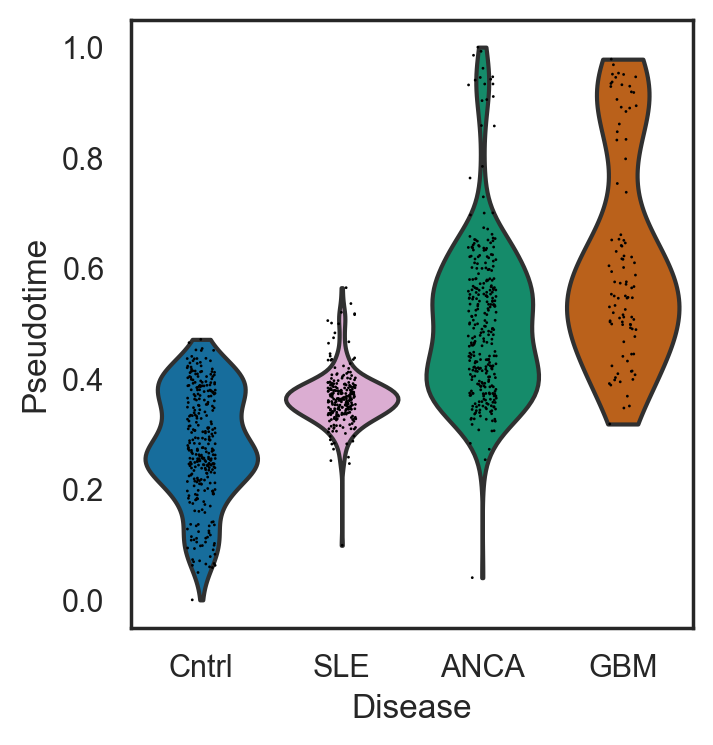

In [5]:
ax = sc.pl.violin(adata, keys="dpt_pseudotime", groupby="Disease", show=False)
ax.set_ylabel("Pseudotime")
plt.savefig("violin_pseudotime_glom_periglom_conditions.pdf", bbox_inches="tight")

In [6]:
adata.obs["Pseudotime"] = adata.obs["dpt_pseudotime"].tolist()

/opt/conda/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


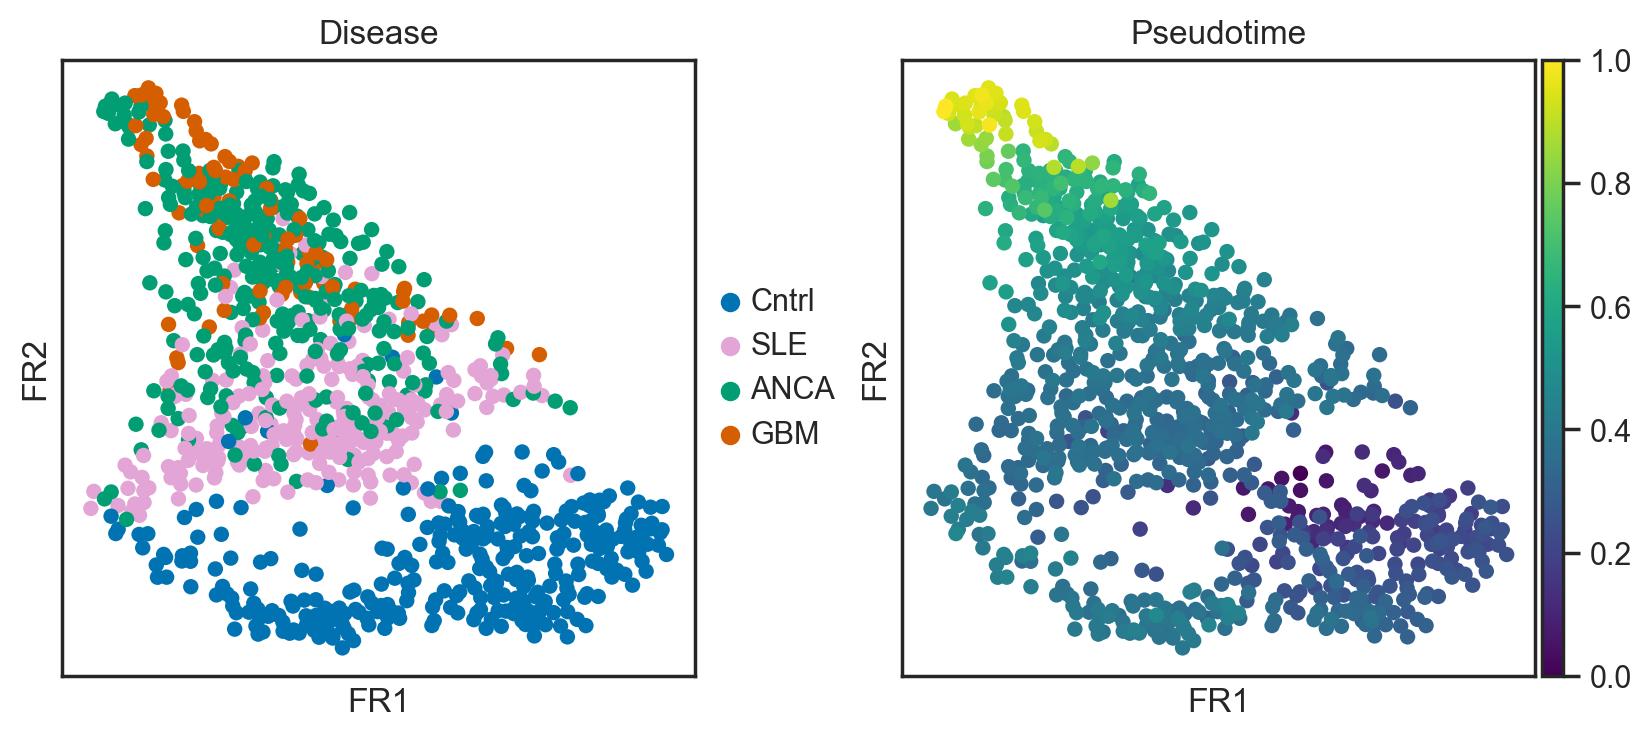

In [7]:
sc.pl.draw_graph(adata, color=["Disease", "Pseudotime"], show=False, cmap="viridis")
plt.savefig("graph_pseudotime_glom_periglom_conditions_pseudotime.pdf", bbox_inches="tight")

/opt/conda/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


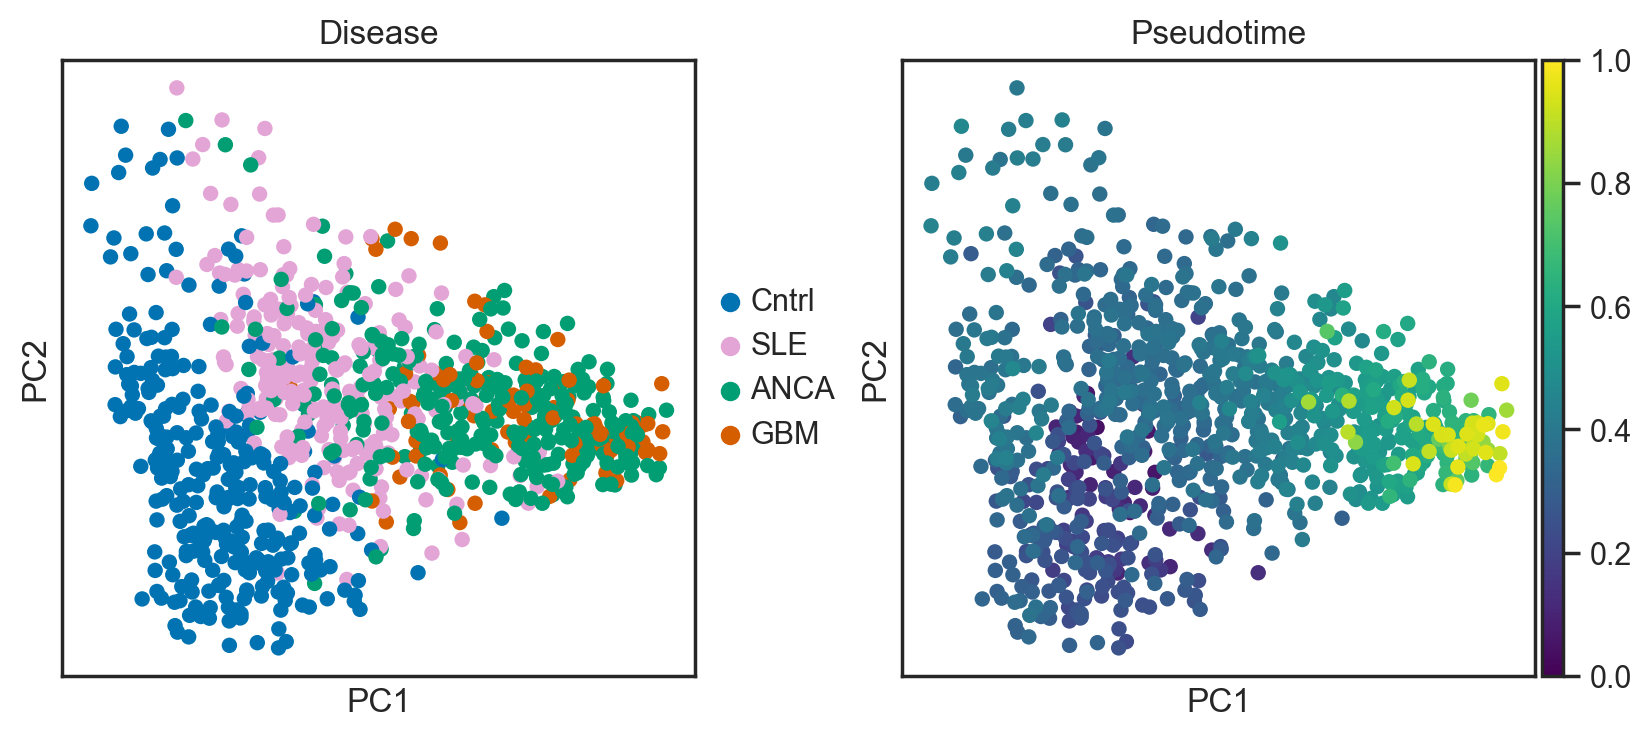

In [8]:
sc.pl.pca(adata, color=["Disease", "Pseudotime"], show=False, cmap="viridis")
plt.savefig("pca_pseudotime_glom_periglom_conditions_pseudotime.pdf", bbox_inches="tight")

In [16]:
df_ps = adata.obs.rename(columns={"dpt_pseudotime": "Pseudotime"})

In [17]:
import pandas as pd
df_ps["Quadrant"] = pd.cut(df_ps.Pseudotime, 4, labels=["1", "2", "3", "4"])

In [25]:
tab = pd.crosstab(df_ps.Disease, df_ps.Quadrant)

In [36]:
tab["Total"] = tab.sum(1)
tab.loc["Total"] = tab.sum(0)

In [37]:
import seaborn as sns
from matplotlib.colors import ListedColormap
sns.set(style="ticks", font_scale=1.2)

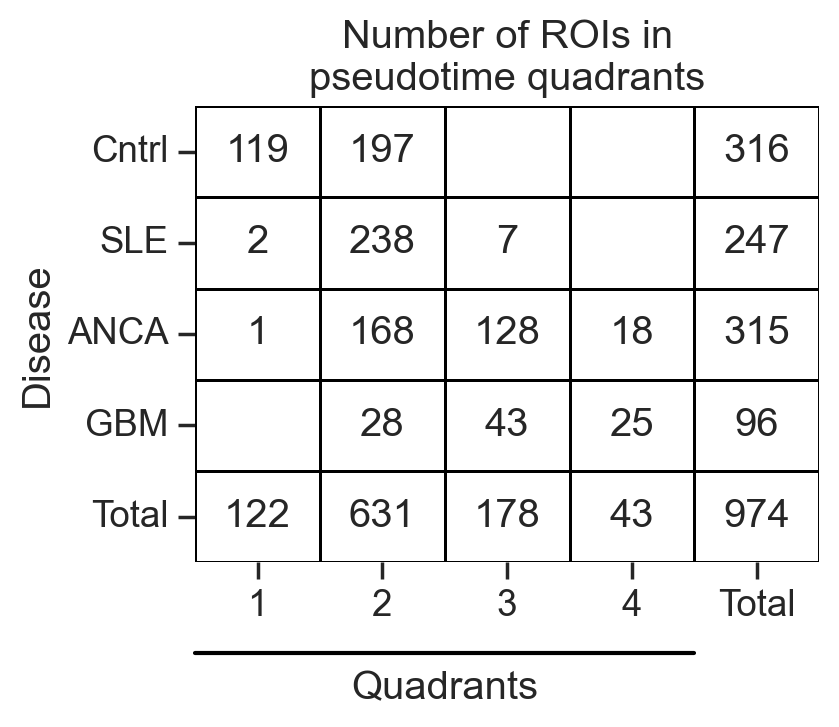

In [73]:
plt.figure(figsize=(4,3))
ax = sns.heatmap(tab, annot=True, fmt="d", cmap=ListedColormap(['white']), linewidths=1, linecolor="black", cbar=False)
for t in ax.texts:
    if t.get_text()=="0":
        t.set_text("")
plt.xlabel("")
ax.text(1.25, 6.5, "Quadrants")
plt.title("Number of ROIs in\npseudotime quadrants")
plt.axhline(y=6, xmax=0.8, clip_on=False, color="black")
plt.savefig("pseudotime_ROI_counts.pdf", bbox_inches="tight")
plt.savefig("pseudotime_ROI_counts.png", bbox_inches="tight")

In [89]:
tab = pd.crosstab(df_ps.Disease, df_ps.Quadrant)
tab = tab.div(tab.sum(0),1)
tab = tab*100

In [90]:
import seaborn as sns
from matplotlib.colors import ListedColormap
sns.set(style="ticks", font_scale=1.2)

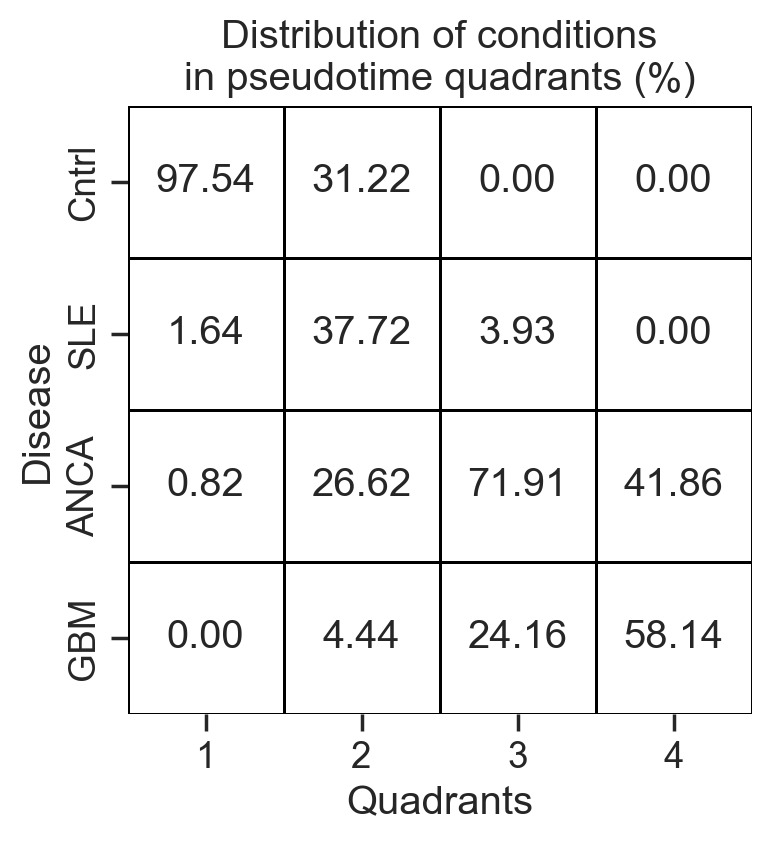

In [94]:
plt.figure(figsize=(4,4))
ax = sns.heatmap(tab, annot=True, fmt=".2f", cmap=ListedColormap(['white']), linewidths=1, linecolor="black", cbar=False)
for t in ax.texts:
    if t.get_text()=="0":
        t.set_text("")
plt.xlabel("Quadrants")
plt.title("Distribution of conditions\nin pseudotime quadrants (%)")
plt.savefig("pseudotime_ROI_dist.pdf", bbox_inches="tight")
plt.savefig("pseudotime_ROI_dist.png", bbox_inches="tight")